In [1]:
#gcloud config set account '746556916249-computer@developer.gserviceaccount.com'

In [1]:
import keras
#from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Activation, Flatten
#from keras.layers.convolutional import Conv2D, MaxPooling2D
#from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import SGD, RMSprop, adam,adadelta
from keras.utils import plot_model,  to_categorical

/home/mhoseinmotamedi/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Input
from keras.utils import np_utils
#from keras.datasets import cifar10
from keras import regularizers

In [3]:
from numpy import *
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

/home/mhoseinmotamedi/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
import os
import sys
#import oauth2client.client

In [5]:
depth = 2
model_type = 'Inception%d'%(depth)

In [6]:
label= pd.read_csv("label4.csv", header=None)

In [7]:
label.shape

(112118, 1)

In [8]:
type(label)

pandas.core.frame.DataFrame

In [9]:
immatrix= pd.read_csv("Imagee_LungCT28.csv", header=None)

In [10]:
immatrix.shape

(112118, 784)

In [11]:
type(immatrix)

pandas.core.frame.DataFrame

In [12]:
#from google.cloud import storage

In [13]:
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

In [14]:
#train_data

In [15]:
#batch_size = 1024
epochs =110
nb_classes =2
nb_epoch =110
img_rows, img_cols = 28, 28
img_channels = 1
nb_filters =32
nb_filters2 =64
nb_filters3 =96
nb_filters4 =128
nb_filters5 =256
nb_pool = 2
nb_conv = 3

In [16]:
def lr_schedule(epochs):

    lr =0.025
    return lr

In [17]:
(X, y) = (train_data[0],train_data[1])
print(X.shape[0])
print(y.shape[0])

112118
112118


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [19]:
y_train.shape

(78482, 1)

In [20]:
X_train = X_train.values.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.values.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /=255
X_test /=255

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print(X_train.shape[0], 'train. samples')
print(X_test.shape[0], 'test. samples')

X_train shape: (78482, 28, 28, 1)
X_test shape: (33636, 28, 28, 1)
78482 train. samples
33636 test. samples


In [21]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [22]:
Y_train
Y_test
shape(Y_train)

(78482, 2)

In [23]:
# Create imput
input_img = Input(shape = (28, 28, 1))

In [24]:
# Create Volumes for the Inception module
volume_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)

volume_2 = Conv2D(96, (1,1), padding='same', activation='relu')(input_img)
volume_2 = Conv2D(128, (3,3), padding='same', activation='relu')(volume_2)

volume_3 = Conv2D(16, (1,1), padding='same', activation='relu')(input_img)
volume_3 = Conv2D(32, (5,5), padding='same', activation='relu')(volume_3)

volume_4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
volume_4 = Conv2D(32, (1,1), padding='same', activation='relu')(volume_4)

# Concatenate all volumes of the Inception module
inception_module = keras.layers.concatenate([volume_1, volume_2, volume_3,
                                             volume_4], axis = 3)

In [25]:
#input_img2= Input(shape = (256, 256, 3))
input_img2= inception_module


# Create Volumes for the Inception module
volume_11 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img2)

volume_22 = Conv2D(96, (1,1), padding='same', activation='relu')(input_img2)
volume_22 = Conv2D(128, (3,3), padding='same', activation='relu')(volume_22)

volume_33 = Conv2D(16, (1,1), padding='same', activation='relu')(input_img2)
volume_33 = Conv2D(32, (5,5), padding='same', activation='relu')(volume_33)

volume_44 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img2)
volume_44 = Conv2D(32, (1,1), padding='same', activation='relu')(volume_44)

# Concatenate all volumes of the Inception module
inception_module2 = keras.layers.concatenate([volume_11, volume_22, volume_33,                                            
                                               volume_44], axis = 3)

In [26]:
output = Flatten()(inception_module2)
#output = Flatten()(inception_module)
Dropout(0.4)
#out    = Dense(10, activation='softmax')(output)

In [27]:
output

<tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>

In [28]:
out    = Dense(2, input_dim=64,
                kernel_regularizer=regularizers.l2(0.004),
                activation='softmax')(output)

In [30]:
out

<tf.Tensor 'dense_1/Softmax:0' shape=(?, 2) dtype=float32>

In [31]:
model = Model(inputs =input_img, outputs = out)
#model = Model(inputs = input_img, outputs = out)
model.summary()
print(model_type)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 96)   192         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 16)   32          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 28, 28, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (

In [32]:
from keras.optimizers import SGD, Adam

lrate = 0.025
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'LUNGData_%s_model.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_acc', verbose=1, save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

In [34]:
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=1024, shuffle=True, callbacks=callbacks)

Train on 78482 samples, validate on 33636 samples
Epoch 1/110
78482/78482 [==============================] - 30s 387us/step - loss: 0.6877 - acc: 0.5865 - val_loss: 0.6414 - val_acc: 0.6224

Epoch 00001: val_acc improved from -inf to 0.62240, saving model to /home/mhoseinmotamedi/saved_models/LUNGData_Inception2_model.001.h5
Epoch 2/110
78482/78482 [==============================] - 26s 337us/step - loss: 0.6373 - acc: 0.6424 - val_loss: 0.6202 - val_acc: 0.6630

Epoch 00002: val_acc improved from 0.62240 to 0.66304, saving model to /home/mhoseinmotamedi/saved_models/LUNGData_Inception2_model.002.h5
Epoch 3/110
78482/78482 [==============================] - 26s 337us/step - loss: 0.6159 - acc: 0.6673 - val_loss: 0.6069 - val_acc: 0.6829

Epoch 00003: val_acc improved from 0.66304 to 0.68287, saving model to /home/mhoseinmotamedi/saved_models/LUNGData_Inception2_model.003.h5
Epoch 4/110
78482/78482 [==============================] - 26s 337us/step - loss: 0.6057 - acc: 0.6800 - val_loss


Epoch 00034: val_acc did not improve from 0.76228
Epoch 35/110
78482/78482 [==============================] - 26s 337us/step - loss: 0.5055 - acc: 0.7675 - val_loss: 0.5176 - val_acc: 0.7566

Epoch 00035: val_acc did not improve from 0.76228
Epoch 36/110
78482/78482 [==============================] - 26s 337us/step - loss: 0.5033 - acc: 0.7692 - val_loss: 0.5228 - val_acc: 0.7594

Epoch 00036: val_acc did not improve from 0.76228
Epoch 37/110
78482/78482 [==============================] - 26s 337us/step - loss: 0.5024 - acc: 0.7691 - val_loss: 0.5163 - val_acc: 0.7634

Epoch 00037: val_acc improved from 0.76228 to 0.76338, saving model to /home/mhoseinmotamedi/saved_models/LUNGData_Inception2_model.037.h5
Epoch 38/110
78482/78482 [==============================] - 26s 337us/step - loss: 0.5048 - acc: 0.7686 - val_loss: 0.5211 - val_acc: 0.7510

Epoch 00038: val_acc did not improve from 0.76338
Epoch 39/110
78482/78482 [==============================] - 26s 337us/step - loss: 0.5001 - 


Epoch 00075: val_acc did not improve from 0.77224
Epoch 76/110
78482/78482 [==============================] - 27s 338us/step - loss: 0.4562 - acc: 0.8048 - val_loss: 0.5194 - val_acc: 0.7698

Epoch 00076: val_acc did not improve from 0.77224
Epoch 77/110
78482/78482 [==============================] - 27s 339us/step - loss: 0.4512 - acc: 0.8082 - val_loss: 0.5239 - val_acc: 0.7696

Epoch 00077: val_acc did not improve from 0.77224
Epoch 78/110
78482/78482 [==============================] - 27s 338us/step - loss: 0.4594 - acc: 0.8027 - val_loss: 0.5886 - val_acc: 0.7109

Epoch 00078: val_acc did not improve from 0.77224
Epoch 79/110
78482/78482 [==============================] - 26s 337us/step - loss: 0.4501 - acc: 0.8091 - val_loss: 0.5174 - val_acc: 0.7730

Epoch 00079: val_acc improved from 0.77224 to 0.77304, saving model to /home/mhoseinmotamedi/saved_models/LUNGData_Inception2_model.079.h5
Epoch 80/110
78482/78482 [==============================] - 26s 337us/step - loss: 0.4524 - 

In [35]:
import matplotlib.pyplot as plt
history =hist
pd.DataFrame(history.history).to_csv("history2_class.csv")

In [36]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 75.17%


In [37]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

33636/33636 [==============================] - 6s 165us/step
Test loss: 0.6048943163282821
Test accuracy: 0.7517243429658699


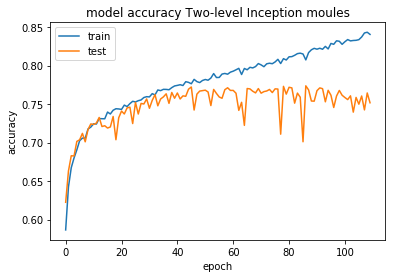

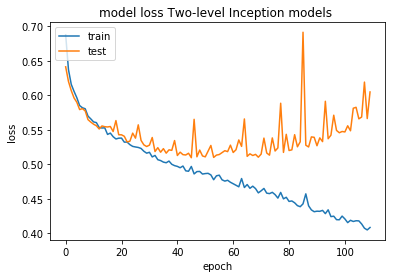

In [64]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy Two-level Inception moules')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss Two-level Inception models ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
y_pred.argmax(axis=1)

array([0, 1, 1, ..., 1, 1, 0])

In [62]:
Y_test.argmax(axis=1)

array([0, 1, 0, ..., 1, 1, 0])

[[11764  6383]
 [ 1968 13521]]


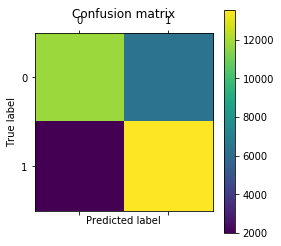

             precision    recall  f1-score   support

          0       0.86      0.65      0.74     18147
          1       0.68      0.87      0.76     15489

avg / total       0.78      0.75      0.75     33636

[[11764  6383]
 [ 1968 13521]]


In [63]:
y_pred = model.predict(X_test)
y_pred2 = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(Y_test, y_pred2)
cm=confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))

print (cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# summarize the fit of the model
from sklearn import metrics
print(metrics.classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(metrics.confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1)));


Confusion matrix, without normalization
[[11764  6383]
 [ 1968 13521]]
Normalized confusion matrix
[[0.65 0.35]
 [0.13 0.87]]


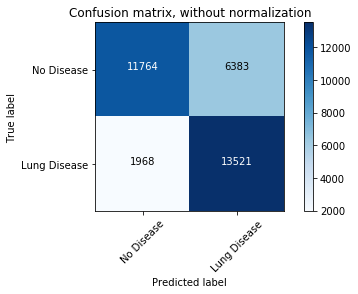

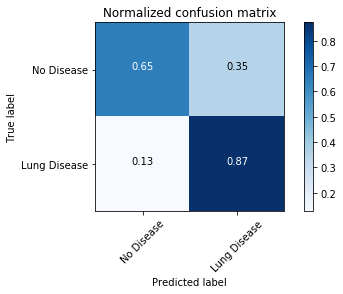

Confusion matrix, without normalization
[[11764  6383]
 [ 1968 13521]]


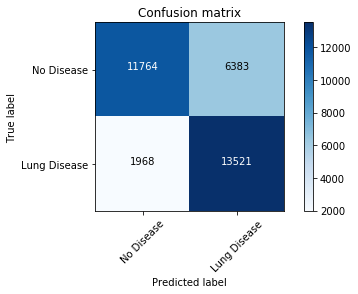

In [66]:
import itertools
classes = ['No Disease', 'Lung Disease']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [ ]:
model.save('SGD_model.h5')

In [56]:
y_pred

array([[0.81181747, 0.18818256],
       [0.37814844, 0.6218515 ],
       [0.31540206, 0.6845979 ],
       ...,
       [0.09088746, 0.9091126 ],
       [0.31149802, 0.688502  ],
       [0.6740448 , 0.32595518]], dtype=float32)